In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Reading Water Level At Galchi

In [70]:
wlg_Sept01_Dec26=pd.read_csv('Dataset/2024/water_level_galchi_Sept01_Dec26.csv')
wlg_Sept01_Dec26.head()
print(wlg_Sept01_Dec26.dtypes)

dateTime    object
value       object
dtype: object


Handling Null Values in Original Dataset Via Interpolation

In [71]:
def handle_null_values(df):
    #for the first null value with no preceeding value.
    df['value']=df['value'].fillna(method='bfill')
    #since water levels are continuous and expected to follow a natural trend we interpolate null values
    df['value']=df['value'].interpolate(method='linear') 

Converting to relevant data types:

In [72]:
def preprocess_data(df):   
    df['dateTime']=pd.to_datetime(df['dateTime'])
    df['value']=pd.to_numeric(df['value'],errors='coerce')
    df.set_index('dateTime',inplace=True)
    handle_null_values(df)


Preprocess Data

In [73]:
#Only the original df should be preprocessed,else there will be error
preprocess_data(wlg_Sept01_Dec26)

C:\Users\aryan\AppData\Local\Temp\ipykernel_3784\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')


Verifying Preprocess Data

In [ ]:
print(wlg_Sept01_Dec26.dtypes)
print(wlg_Sept01_Dec26)
print(wlg_Sept01_Dec26.isnull().sum())

In [77]:
wlc_Sept01_Dec26=pd.read_csv('Dataset/2024/water_level_chumlingtar_Sept01_Dec26.csv')
wlc_Sept01_Dec26.head()
# print(wlc_Sept01_Dec26.dtypes)

,dateTime,value
0,2024-09-01 00:00:00,
1,2024-09-10 07:04:58,1.36950004101
2,2024-09-10 07:14:58,1.3696000576
3,2024-09-10 07:24:58,1.36979997158
4,2024-09-10 07:34:58,1.36870002747


In [80]:
print(wlc_Sept01_Dec26.isnull().sum())
print('----------------------------')
print(wlc_Sept01_Dec26.dtypes)


dateTime    0
value       0
dtype: int64
----------------------------
dateTime    object
value       object
dtype: object


Preprocess Water Level at Chumlingtar

In [81]:
preprocess_data(wlc_Sept01_Dec26)

C:\Users\aryan\AppData\Local\Temp\ipykernel_3784\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')


In [85]:
wlc_Sept01_Dec26.head()

,value
dateTime,
2024-09-01 00:00:00,1.3695
2024-09-10 07:04:58,1.3695
2024-09-10 07:14:58,1.3696
2024-09-10 07:24:58,1.3698
2024-09-10 07:34:58,1.3687


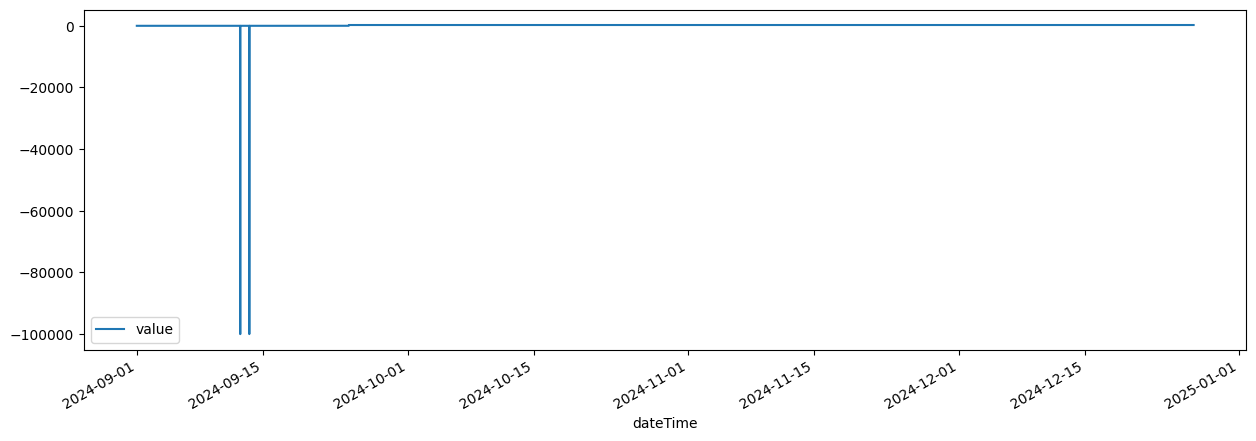

In [94]:
fig,ax=plt.subplots(figsize=(15,5))
wlc_Sept01_Dec26.plot(ax=ax)
plt.show()

In [193]:
def rolling_statistics(input_data):
    window_size=5 #7*144 interval/day
    rolling_mean=input_data.rolling(window=window_size).mean()
    rolling_std=input_data.rolling(window=window_size).std()
    
    fig,ax=plt.subplots(3,1,figsize=(15,5))
    orig=ax[0].plot(input_data,color='black',label='original')
    
    # Calculate the min and max values 
    min_value = input_data.min()
    max_value = input_data.max()

    # Adding a small margin to the min and max values to make sure the plot is not clipped
    margin = 0.05  # 5% margin
    min_margin = min_value - margin * (max_value - min_value)
    max_margin = max_value + margin * (max_value - min_value)

    # Set the y-axis limits dynamically
    ax[0].set_ylim(min_margin, max_margin)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))
    
    ax[0].legend(loc='best')
    
    mean=ax[1].plot(rolling_mean,color='green',label='Rolling mean')
    std=ax[2].plot(rolling_std,color='blue',label='Rolling std')
    ax[1].legend(loc='best')
    ax[2].legend(loc='best')
    ax[1].set_title('Rolling Mean')
    ax[2].set_title('Std Dev')
    plt.show()
    

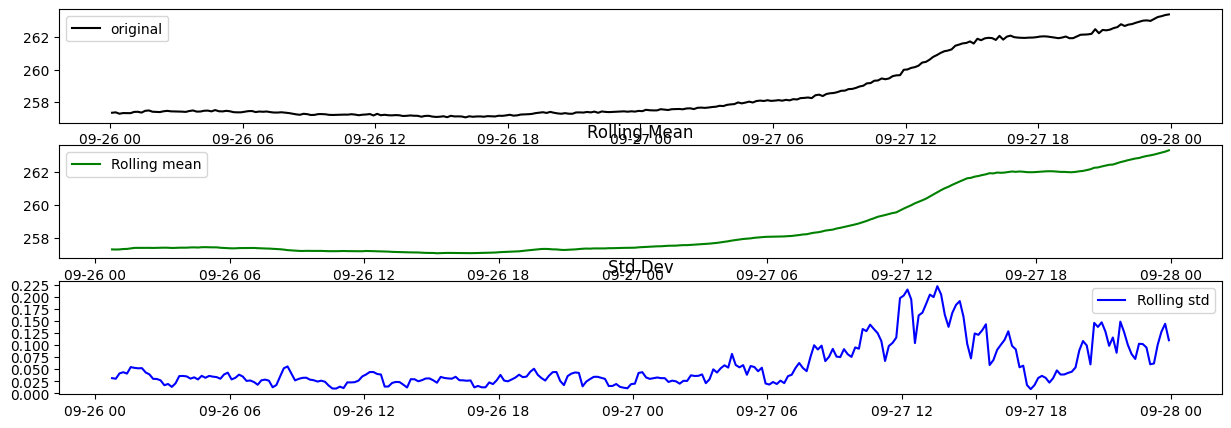

In [194]:
wlc_Sept26_Oct03=wlc_Sept01_Dec26['2024-09-26':'2024-09-27']
rolling_statistics(wlc_Sept26_Oct03['value'])